In [1]:
import numpy as np
import matplotlib.pyplot as plt

def stokes_law(radius, beta, nu):
    """
    Computes the terminal velocity of a sphere in a fluid in the Stokes regime Re<<1.
    """
    g = 9.81
    v_s = 2 * (beta - 1) * g * radius ** 2 / (9 * nu)

    return v_s


def Reynolds_number(radius, w, nu):
    """
    Compute the Reynolds number of a particle.
    """
    Re = w * 2* radius / nu
    return Re


def corrected_vs(vs, radius):
    """
    Computes the terminal velocity of a sphere for when Re>1 using 
    C known as the Schiller–Naumann coefficient.
    """
    g = 9.81
    nu = 1.5e-6
    Re = Reynolds_number(radius, vs, nu)
    C = 1 + 0.15 * Re ** 0.687
    
    v_s_new = vs/C

    return v_s_new


def regime_change(radius, Re=1):
    """
    Compute range of the sinking velocity for fixed Re number
    """
    ν = 1.5e-6
    U = ν * Re / (2 * radius)
    
    return U

def reynolds_regimes(radius, Re=1):
    """
    Solve the U of particle at which the Reynolds number is at a certain value
    from the Re definition.
    """
    nu = 1.5e-6
    U = nu * Re / (2*radius)

    return U

def limit_radius(Re, nu, beta):
    """
    Solve the radius of particle at which the Reynolds number is at a certain value
    from the Re definition and the Stokes law sinking velocity.
    """
    R = ((9*Re*nu**2)/(4*(beta-1)*9.8))**(1/3)
    
    return R

In [2]:
buoyancy_ratios = [1.38/1.05,1.38/1.025] # buoyancy ratios of PET particles in a stratified ocean

In [3]:
R_limit = limit_radius(1, 1e-6, buoyancy_ratios[1])
print("The regime changes (Re>1) at radius: ", R_limit, "m")
R_limit = 1e-4 # rounding 

The regime changes (Re>1) at radius:  8.71934747151849e-05 m


In [4]:
radiuses = np.logspace(-9, -2, 1000)
radiuses_largeRe = np.logspace(-4, -2, 1000) # from regime change


In [5]:
nu = 1.5e-6 # assumed value in simulations

# terminal velocities for Re<<1 
sts_b1 = stokes_law(radiuses, buoyancy_ratios[0], nu)
sts_b2 = stokes_law(radiuses, buoyancy_ratios[1], nu)

# terminal velocities for Re>1 Gray shading in plot
Re_1 = reynolds_regimes(radiuses, Re=1)
Re_1000 = reynolds_regimes(radiuses, Re=10000000) 

In [6]:
sts_b1_CRE = corrected_vs(sts_b1, radiuses)
sts_b2_CRE = corrected_vs(sts_b2, radiuses)

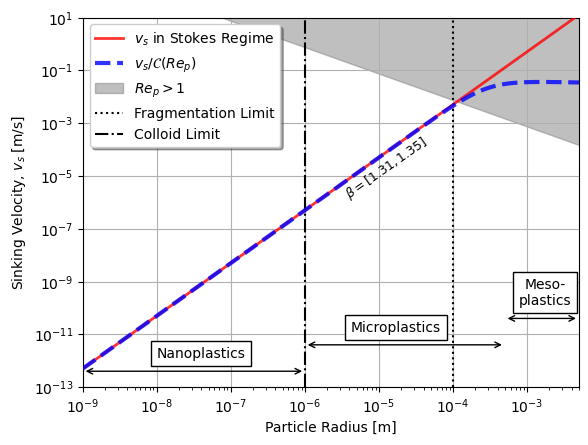

In [9]:
plt.plot(radiuses, sts_b2, color='red', alpha=0.8, label=r'$v_s$ in Stokes Regime',
                 zorder=10, linestyle='-', lw=2)
plt.plot(radiuses, sts_b2_CRE, color='blue', alpha=0.8, label=r'$v_s$/$\mathcal{C}(Re_p)$',
                 zorder=10, linestyle='--', lw=3)


plt.fill_between(radiuses, Re_1, Re_1000, color='gray', alpha=0.5, label=r'$Re_p > 1$')

plt.axvline(R_limit, color='black', linestyle=':', label='Fragmentation Limit', lw=1.5)
plt.axvline(1e-6, color='black', linestyle='-.', label='Colloid Limit', lw=1.5)

plt.semilogy()
plt.semilogx()
plt.xlabel('Particle Radius [m]')
plt.ylabel('Sinking Velocity, $v_s$ [m/s]')
plt.legend(loc='upper left', shadow=True)
plt.grid()

# microplastics scales 
plt.annotate("", xy=(1e-9, 4e-13), xytext=(1e-6, 4e-13), arrowprops=dict(arrowstyle="<->", color='black'))
text1 = plt.text(4e-8, 1e-12, 'Nanoplastics', fontsize=10, ha='center', va='bottom')
text1.set_bbox(dict(facecolor='white', alpha=1, edgecolor='k'))

plt.annotate("", xy=(1e-6, 4e-12), xytext=(1e-3/2, 4e-12), arrowprops=dict(arrowstyle="<->", color='black'))
text2 = plt.text(1.7e-5, 1e-11, 'Microplastics', fontsize=10, ha='center', va='bottom')
text2.set_bbox(dict(facecolor='white', alpha=1, edgecolor='k'))

plt.annotate("", xy=(1e-3/2, 4e-11), xytext=(1e-2/2, 4e-11), arrowprops=dict(arrowstyle="<->", color='black'))
# plt.text(4e-3/2, 1e-9, 'meso-', fontsize=12, ha='center', va='bottom')
text3 = plt.text(3.5e-3/2, 1e-10, 'Meso-\nplastics', fontsize=10, ha='center', va='bottom')
text3.set_bbox(dict(facecolor='white', alpha=1, edgecolor='k'))

plt.text(2.5e-5/2, 1e-6, r'$\beta = [{:.2f}, {:.2f}]$'.format(buoyancy_ratios[0], buoyancy_ratios[1]), fontsize=9, ha='center', va='bottom', color='k', rotation=35)

plt.ylim(1e-13, 1.e1)
plt.xlim(1e-9, 1e-2/2)

plt.savefig('../article_figs/Figure1.png', dpi=300, bbox_inches='tight')